In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,r2_score, accuracy_score, mean_absolute_error,log_loss

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

## Classification

In [53]:
df=pd.read_csv('metrics_compact.csv')
df.fillna(value = 0, inplace=True)
#df['rating'].fillna(df['rating'].mean(), inplace=True)
final = pd.get_dummies(df, columns=['usergroup'],drop_first=True)
final['rating'] = final['rating'].astype('int32')
final.drop(['chat_id','conv_id'], axis=1, inplace=True)
final.head()

,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords,usergroup_default
0,1.0,9.50,4,23,True,8,3,0.0,1
1,1.0,11.00,5,77,True,8,3,2.0,1
2,1.0,19.67,4,66,False,11,4,0.0,1
3,1.0,164.00,5,844,True,9,4,4.0,1
4,1.0,152.67,4,490,True,11,5,4.0,1


In [54]:
X = final.drop('rating',axis=1)
y = final['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
probs = dtree.predict_proba(X_test)
print("Loss: ",log_loss(y_test, probs))
print("Accuracy: ",accuracy_score(y_test, predictions))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Loss:  14.328313351600505
Accuracy:  0.5851528384279476
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.00      0.00      0.00         3
           2       0.09      0.11      0.10         9
           3       0.14      0.17      0.15        12
           4       0.26      0.26      0.26        38
           5       0.69      0.64      0.67       123

   micro avg       0.59      0.59      0.59       229
   macro avg       0.35      0.36      0.35       229
weighted avg       0.60      0.59      0.59       229

[[42  0  0  0  2  0]
 [ 0  0  0  0  0  3]
 [ 0  0  1  1  2  5]
 [ 0  0  2  2  2  6]
 [ 1  2  3  1 10 21]
 [ 4  3  5 10 22 79]]


In [57]:
rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [58]:
probs = rfc.predict_proba(X_test)
print("Loss: ",log_loss(y_test, probs))
print("Accuracy: ",accuracy_score(y_test, predictions))

Loss:  1.207156802623858
Accuracy:  0.6593886462882096


In [50]:
print("---- REPORT ---- \n",classification_report(y_test,predictions))
print("---- CONFUSION ---- \n",confusion_matrix(y_test,predictions))

---- REPORT ---- 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.00      0.00      0.00         9
           2       0.25      0.25      0.25         4
           3       0.11      0.11      0.11         9
           4       0.42      0.22      0.29        46
           5       0.70      0.84      0.76       117

   micro avg       0.67      0.67      0.67       229
   macro avg       0.40      0.40      0.39       229
weighted avg       0.62      0.67      0.64       229

---- CONFUSION ---- 
 [[43  0  0  0  0  1]
 [ 0  0  0  1  2  6]
 [ 0  0  1  0  1  2]
 [ 0  1  0  1  1  6]
 [ 2  2  2  3 10 27]
 [ 3  1  1  4 10 98]]


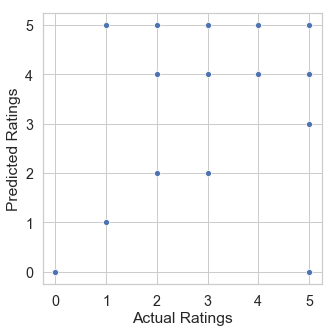

In [106]:
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))

rfc = sns.scatterplot(y_test, predictions, palette='viridis')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")


#rfc_fig = rfc.get_figure()
#rfc_fig.savefig("../documentation/images/rfc.eps", format='eps', bbox_inches='tight')


### Save Model

In [51]:
filename = 'best_rfc.sav'

In [118]:
best_classifier= rfc


pickle.dump(best_classifier, open(filename, 'wb'))


### Restore Model

In [52]:
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_best = loaded_model.predict(X_test)
probs_best = loaded_model.predict_proba(X_test)
print("Best Loss: ",log_loss(y_test, probs_best))
print("Best Accuracy: ",accuracy_score(y_test, y_pred_best))

Best Loss:  1.3450020100447821
Best Accuracy:  0.62882096069869


## Regression

In [44]:
df_reg=pd.read_csv('metrics_compact.csv')
df_reg.fillna(value = 0, inplace=True)
#df_reg['rating'].fillna(df_reg['rating'].mean(), inplace=True)
final_reg = pd.get_dummies(df_reg, columns=['usergroup'],drop_first=True)
final_reg.drop(['chat_id','conv_id'], axis=1, inplace=True)

X_reg = final_reg.drop('rating',axis=1)
y_reg = final_reg['rating']
#StandardScaler().fit_transform(X_reg)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, 
                                                                    y_reg, test_size=0.3, random_state=150, 
                                                                    shuffle=False)

In [45]:
sc = StandardScaler()
X_train_reg = sc.fit_transform(X_train_reg)
X_test_reg = sc.transform(X_test_reg)


regressor = RandomForestRegressor(n_estimators=2000)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
print("RMSE: ",np.sqrt(mean_absolute_error(y_test_reg, y_pred_reg)))
print("R2: ",r2_score(y_test_reg, y_pred_reg, multioutput='variance_weighted'))

RMSE:  0.889368305334045
R2:  0.6635419044367956


### Save Model

In [6]:
filename = 'best_rfr.sav'

In [125]:
best_regressor= regressor


pickle.dump(best_regressor, open(filename, 'wb'))

### Restore Model

In [47]:
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_best = loaded_model.predict(X_test_reg)

print("Best RMSE: ",np.sqrt(mean_absolute_error(y_test_reg, y_pred_best)))
print("Best R2: ",r2_score(y_test_reg, y_pred_best, multioutput='variance_weighted'))

Best RMSE:  0.759179630779431
Best R2:  0.8046991519491947


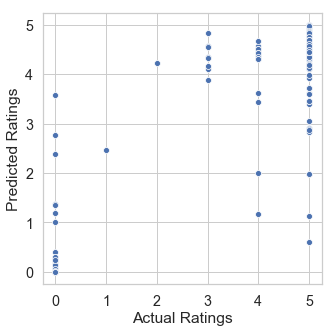

In [43]:
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))

rfr = sns.scatterplot(y_test_reg, y_pred_best, palette='viridis')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")


rfr_fig = rfr.get_figure()
#rfr_fig.savefig("../documentation/images/rfr.eps", format='eps', bbox_inches='tight')

